<a href="https://colab.research.google.com/github/cnbltyasar/mnist-fashion-Deep-Learning-/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Authentication Processes...

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls drive

MyDrive


### library setup

In [ ]:
!pip3 install -q keras

###Let's take a look at the Fashion MNIST dataset!


![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)
![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif)

###Installing required Packages...

In [50]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import random

### Importing the Data

In [53]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### The Sample from Dataset

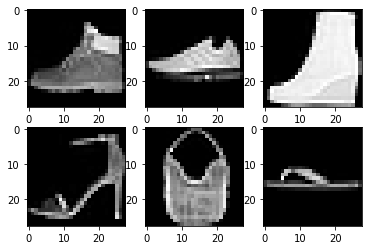

In [81]:

f, axarr = plt.subplots(2,3)
for i in range(2):
  for j in range(3):
      axarr[i, j].imshow(x_train[random.randint(0, 1000)], cmap = 'gray')
plt.show()



### Let's see what classes are in the Fashion MNIST dataset, which consists of 10 classes!


In [41]:
# fashion mnist data labels
fashion_mnist_labels = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

**Let's pull the weights of the previously trained model from the `model_fashion-mnist_cnn_train2_epoch24.h5` file and preprocess the input images according to the model input!**

1/1 [==============================] - 0s 16ms/step


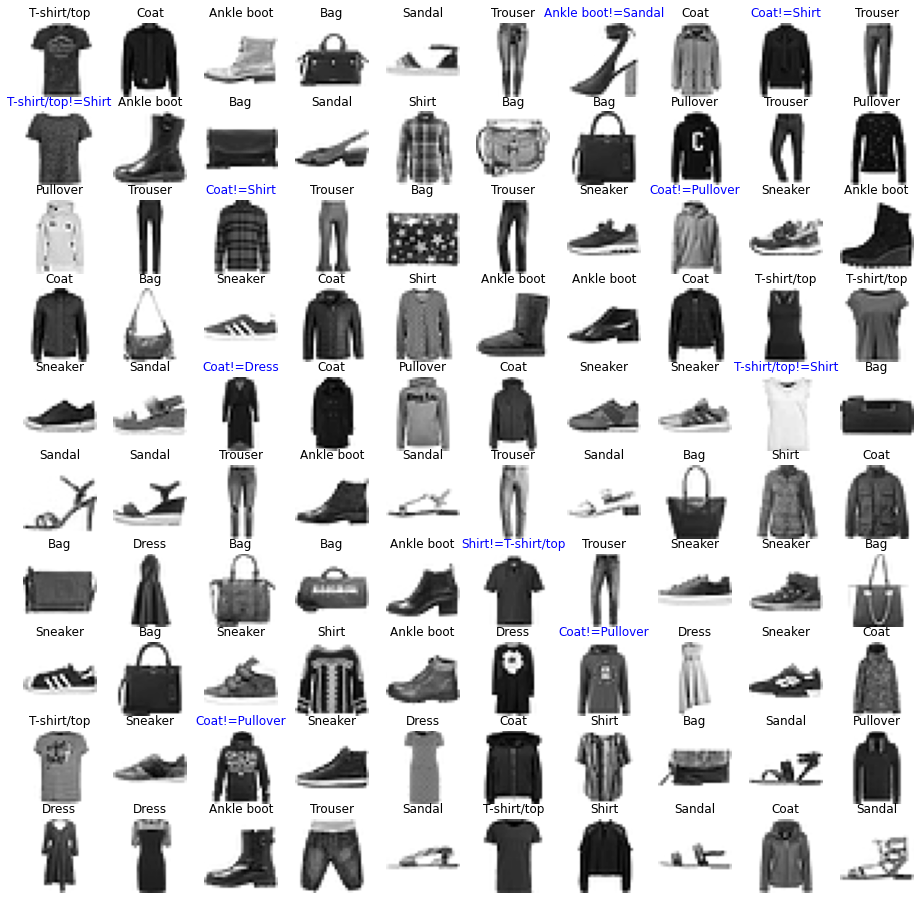

In [82]:
model = load_model('/content/drive/MyDrive/Colab_Notebooks/save_models/model_fashion-mnist_cnn_train2_epoch24.h5')

def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 100

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #write(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        #predicted class != real class
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#0000FF')
        mistake += 1
                                                                   
plt.show()

In [83]:
print("The number of True Prediction:", right)
print("The number of mistake:", mistake)
print("The accuracy of model:", right/(mistake + right)*100, '%')

The number of True Prediction: 90
The number of mistake: 10
The accuracy of model: 90.0 %
